In [2]:
import sys
sys.path.append("../")

import yaml
import matplotlib.pyplot as plt
import cattrs
from typing import List
#from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict
from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict, TrialType

In [3]:
def read_experiments(experimnt_history):
    with open(experimnt_history, 'r') as f:
        obj = yaml.safe_load(f)
    
    experiments = cattrs.structure(obj, List[Experiment])
    return experiments


def get_experiment_result(experiment: Experiment):
    val_results: List[Dict[str, ValResult]] = []
    domain_weights: List[Dict[str, float]] = []
    weighted_perplexity = []
    for i, trial in enumerate(experiment.trials):
        if not trial.weighted_val_perplexity:
            print(f"Trial {i} did not finish yet. Breaking")
            break
        val_results.append(trial.val_results)
        weighted_perplexity.append(trial.weighted_val_perplexity)
        domain_weights.append(trial.true_mixing_weights)
    return val_results, weighted_perplexity, domain_weights

def plot_weighted_val_perplexity(weighted_val_perplexities: List[float], no_initial_runs: int = 0):
    plt.plot(weighted_val_perplexities)
    plt.scatter(range(len(weighted_val_perplexities)), weighted_val_perplexities)
    plt.axvline(x=no_initial_runs - 1, color='r', linestyle='--')
    plt.xlabel('Run')
    plt.ylabel('Weighted Val Perplexity')
    plt.title('Weighted Val Perplexity')

def plot_domain_perplexities(val_results: List[Dict[str, ValResult]], no_initial_runs: int = 0):
    max_plots_per_row = 4
    domains = val_results[0].keys()
    num_plots = len(domains)
    num_rows = num_plots // max_plots_per_row + 1
    num_cols = min(num_plots, max_plots_per_row)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    fig.suptitle('Domain Perplexities')
    axs = axs.flatten()

    for i, domain in enumerate(domains):
        domain_perplexities = [val_result[domain].perplexity for val_result in val_results]
        axs[i].plot(domain_perplexities)
        axs[i].set_title(domain)
        axs[i].set_xlabel('Run')
        axs[i].set_ylabel('Perplexity')
        axs[i].axvline(x=no_initial_runs - 1, color='r', linestyle='--')
        axs[i].scatter(range(len(domain_perplexities)), domain_perplexities)
    plt.tight_layout()  

def plot_mixing_weights(mixing_weights: List[Dict[str, float]], no_initial_runs: int = 0):
    max_plots_per_row = 4
    domains = mixing_weights[0].keys()
    num_plots = len(domains)
    num_rows = num_plots // max_plots_per_row + 1
    num_cols = min(num_plots, max_plots_per_row)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    fig.suptitle('Mixing Weights')
    axs = axs.flatten()

    for i, domain in enumerate(domains):
        mix_w = [weight[domain] for weight in mixing_weights]
        axs[i].plot(mix_w)
        axs[i].set_title(domain)
        axs[i].set_xlabel('Run')
        axs[i].set_ylabel('Mixing Weight')
        axs[i].legend()
        axs[i].axvline(x=no_initial_runs - 1, color='r', linestyle='--')
        axs[i].scatter(range(len(mix_w)), mix_w)
    plt.tight_layout()  

Trial 23 did not finish yet. Breaking


/tmp/ipykernel_1425847/4081075433.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


Best trial achieved a weighted val perplexity of 4.231648612767458. The mixing weights were {'Books': 0.2779423727245769, 'CC': 0.1833587707342023, 'Pes2O': 0.2595458267699398, 'stack-v4': 0.27915302977128104}. Trial idx: 16


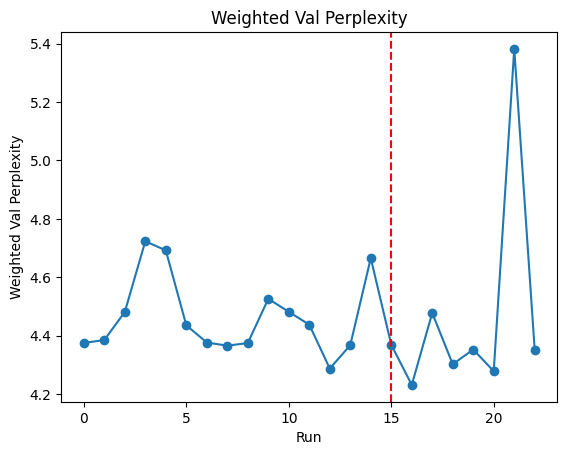

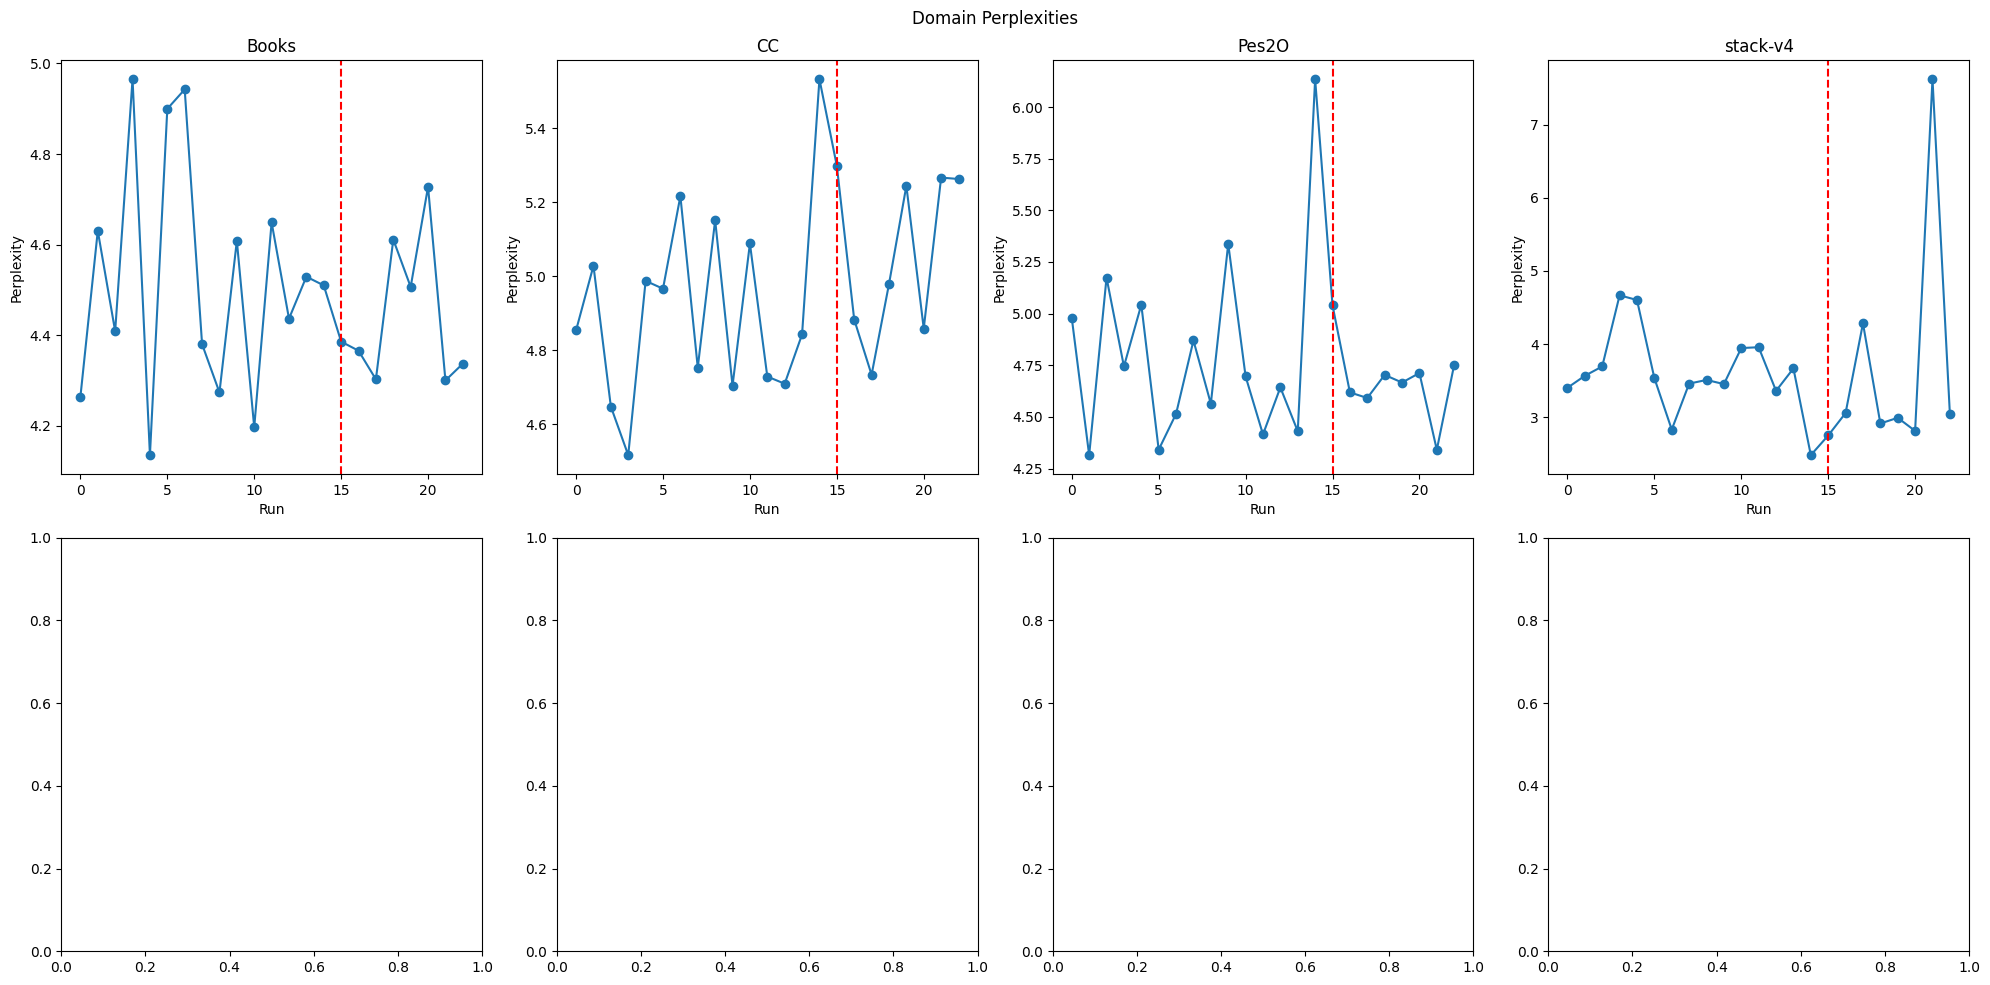

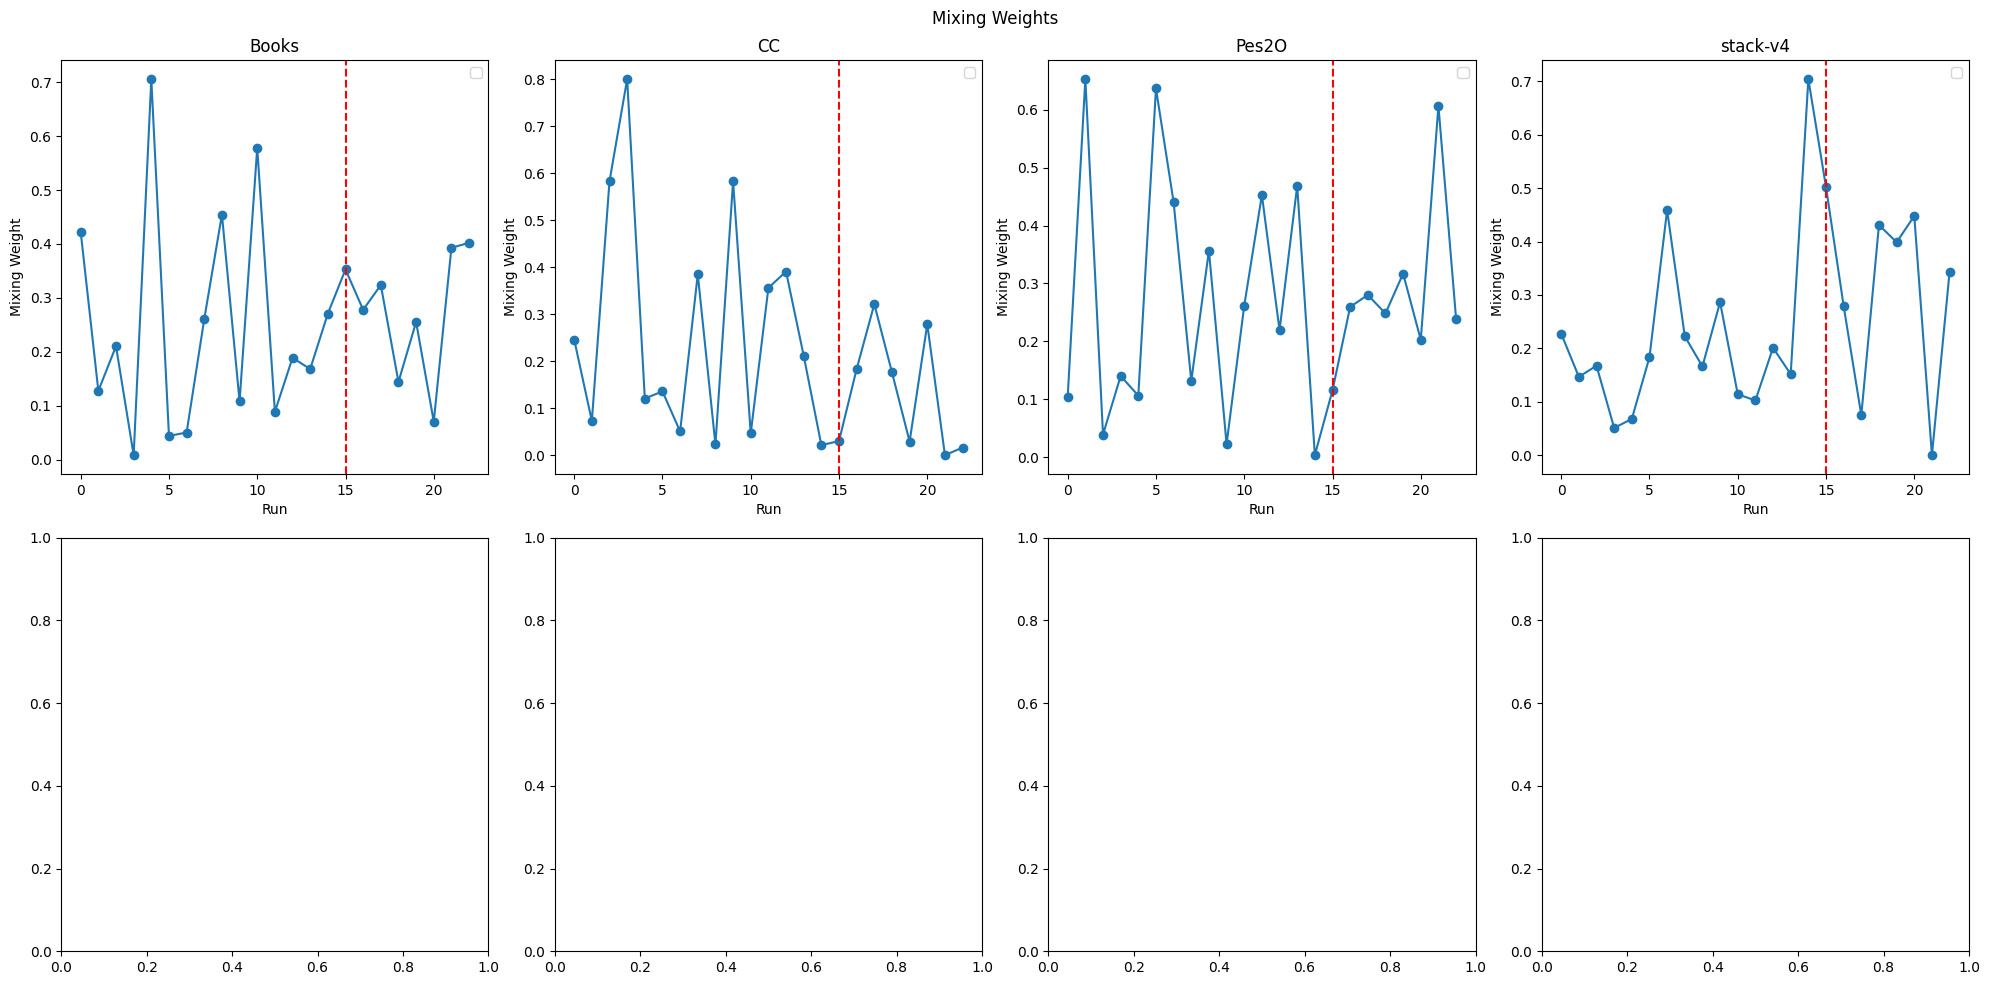

In [4]:
#path = "/root/code/mixture_optimization/logs/bayesian_books_cc_stack_few_init_0/experiment_history.yaml"
#path = "/root/code/mixture_optimization/logs/turbo_books_cc_stack_0/experiment_history.yaml"
#path="/root/code/mixture_optimization/logs/bayesian_books_cc_stack_0/experiment_history.yaml"
path = "/root/code/mixture_optimization/logs/bayesian_books_cc_stack_pes2o_0/experiment_history.yaml"
#path="/root/code/mixture_optimization/logs/bayesian_books_cc_stack_pes2o_16init_0/experiment_history.yaml"
experiments = read_experiments(path)
experiment = experiments[0]

no_initi_trials = sum([1 for trial in experiment.trials if trial.type == TrialType.INITIALIZATION])

val_results, weighted_perplexity, domain_weights = get_experiment_result(experiment)
plot_weighted_val_perplexity(weighted_perplexity, no_initial_runs=no_initi_trials)
plot_domain_perplexities(val_results, no_initial_runs=no_initi_trials)
plot_mixing_weights(domain_weights, no_initial_runs=no_initi_trials)


best_trial = None
for trial in experiment.trials:
    if trial.val_results is None:
        continue

    if best_trial is None or trial.weighted_val_perplexity < best_trial.weighted_val_perplexity:
        best_trial = trial
    
print(f"Best trial achieved a weighted val perplexity of {best_trial.weighted_val_perplexity}. The mixing weights were {best_trial.true_mixing_weights}. Trial idx: {best_trial.idx}")